In [1]:
# coding 
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
from statsmodels.tsa.api import Holt


In [2]:
# downloading csv
state_min = pd.read_csv("Minimum Wage Data.csv",encoding='cp1252')

In [3]:
# downloading csv
fed_min = pd.read_csv("MinimumWage.csv",encoding='cp1252')

In [4]:
# downloading csv
political_party = pd.read_csv("MinWage_PartyControl.csv",encoding='cp1252')

In [5]:
# downloading csv
gas_prices = pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv",encoding='cp1252')

In [6]:
# visualizing the csv
state_min

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


In [7]:
# visualizing the csv
fed_min

,Year,FederalMinimumWage,MeanAnnualInflation,MinWageIndexedLastRaiseYear,UnemploymentRateDecember,GDP_AnnualGrowth
0,1930,$0.00,-2.30%,NaN,8.70%,-8.50%
1,1931,$0.00,-9.00%,NaN,15.90%,-6.40%
2,1932,$0.00,-9.90%,NaN,23.60%,-12.90%
3,1933,$0.00,-5.10%,NaN,24.90%,-1.20%
4,1934,$0.00,3.10%,NaN,21.70%,10.80%
5,1935,$0.00,2.20%,NaN,20.10%,8.90%
6,1936,$0.00,1.50%,NaN,16.90%,12.90%
7,1937,$0.00,3.60%,NaN,14.30%,5.10%
8,1938,$0.25,-2.10%,$0.25,19.00%,-3.30%
9,1939,$0.30,-1.40%,$0.30,17.20%,8.00%


In [8]:
# visualizing the csv
political_party

,Year,PresParty,SenParty,HouseParty,TrifectaFlag,FedMinWage,RateChange,PercentChange,IncreaseFlag,YearsSinceLastChange
0,1938,Democrat,Democrat,Democrat,Democrat,$0.25,$0.25,100.00,True,0
1,1939,Democrat,Democrat,Democrat,Democrat,$0.30,$0.05,16.67,True,1
2,1940,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,1
3,1941,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,2
4,1942,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,3
5,1943,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,4
6,1944,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,5
7,1945,Democrat,Democrat,Democrat,Democrat,$0.40,$0.10,25.00,True,6
8,1946,Democrat,Democrat,Democrat,Democrat,$0.40,$0.00,0.00,False,1
9,1947,Democrat,Republican,Republican,None,$0.40,$0.00,0.00,False,2


In [9]:
# visualizing the csv
gas_prices

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [10]:
#joining state min wage with fed
fed_state_join = state_min.merge(fed_min, how='inner')

In [11]:
fed_state_join

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote,FederalMinimumWage,MeanAnnualInflation,MinWageIndexedLastRaiseYear,UnemploymentRateDecember,GDP_AnnualGrowth
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN,$1.60,4.20%,$1.60,3.40%,4.90%
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN,$1.60,4.20%,$1.60,3.40%,4.90%
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b),$1.60,4.20%,$1.60,3.40%,4.90%
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b),$1.60,4.20%,$1.60,3.40%,4.90%
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b),$1.60,4.20%,$1.60,3.40%,4.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c],$7.25,1.20%,$5.99,6.70%,-3.40%
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%


In [12]:
#joining min wage with political party
all_plus_pol = fed_state_join.merge(political_party, how='inner')

In [13]:
all_plus_pol

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,TrifectaFlag,FedMinWage,RateChange,PercentChange,IncreaseFlag,YearsSinceLastChange
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11


In [14]:
#visuallizing the date to join with the rest of the data
gas_prices.Date
#have to change the date style

0       01/02/1995
1       01/09/1995
2       01/16/1995
3       01/23/1995
4       01/30/1995
           ...    
1356    12/28/2020
1357    01/04/2021
1358    01/11/2021
1359    01/18/2021
1360    01/25/2021
Name: Date, Length: 1361, dtype: object

In [15]:
gas_prices['Date'] = pd.to_datetime(gas_prices['Date'],format='%m/%d/%Y')
gas_prices

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [16]:
#making a date column with only year
gas_prices['Year'] = gas_prices.Date.dt.year
gas_prices = pd.DataFrame(gas_prices)

In [17]:
# merging gasprices & all_plus_political.
update = all_plus_pol.merge(gas_prices, how='inner')

In [18]:
update

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [19]:
#making all combined updated data into a DataFrame
df = pd.DataFrame(update)

In [20]:
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [21]:
# renaming collunns
df['state_wage'] = df['State.Minimum.Wage']
df['fed_wage'] = df['Federal.Minimum.Wage']
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R3,M1,M2,M3,P1,P2,P3,D1,state_wage,fed_wage
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,0.00,4.25
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,0.00,4.25
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,0.00,4.25
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,0.00,4.25
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,0.00,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502,5.15,7.25
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526,5.15,7.25
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559,5.15,7.25
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619,5.15,7.25


- A1: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
- A2: Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)
- A3: Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)
- R1: Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
- R2: Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)
- R3: Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)
- M1: Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)
- M2: Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)
- M3: Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)
- P1: Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)
- P2: Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)
- P3: Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon)
- D1: Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)

- Description of Data
The values in the dataset are as follows:

Year: The year of the data. All minimum wage values are as of January 1 except 1968 and 1969, which are as of February 1.
- State: The state or territory of the data.
- State.Minimum.Wage: The actual State's minimum wage on January 1 of Year.
- State.Minimum.Wage.2020.Dollars: The State.Minimum.Wage in 2020 dollars.
- Federal.Minimum.Wage: The federal minimum wage on January 1 of Year.
- Federal.Minimum.Wage.2020.Dollars: The Federal.Minimum.Wage in 2020 dollars.
- Effective.Minimum.Wage: The minimum wage that is enforced in State on January 1 of Year. Because the federal minimum wage takes effect if the State's minimum wage is lower than the federal minimum wage, this is the higher of the two.
- Effective.Minimum.Wage.2020.Dollars: The Effective.Minimum.Wage in 2020 dollars.
- CPI.Average: The average value of the Consumer Price Index in Year. When I pulled the data from the Bureau of Labor Statistics, I selected the dataset with "all items in U.S. city average, all urban consumers, not seasonally adjusted".
- Department.Of.Labor.Uncleaned.Data: The unclean, scraped value from the Department of Labor's website.
- Department.Of.Labor.Cleaned.Low.Value: The State's lowest enforced minimum wage on January 1 of Year. If there is only one minimum wage, this and the value for Department.Of.Labor.Cleaned.High.Value are identical. (Some states enforce different minimum wage laws depending on the size of the business. In states where this is the case, generally, smaller businesses have slightly lower minimum wage requirements.)
- Department.Of.Labor.Cleaned.Low.Value.2020.Dollars: The Department.Of.Labor.Cleaned.Low.Value in 2020 dollars.
- Department.Of.Labor.Cleaned.High.Value: The State's higher enforced minimum wage on January 1 of Year. If there is only one minimum wage, this and the value for Department.Of.Labor.Cleaned.Low.Value are identical.
- Department.Of.Labor.Cleaned.High.Value.2020.Dollars: The Department.Of.Labor.Cleaned.High.Value in 2020 dollars.
- Footnote: The footnote provided on the Department of Labor's website. See more below.



### For state data - " columns to drop because we dont need this information, we only need the state minimums"

- State.Minimum.Wage.2020.Dollars: The State.Minimum.Wage in 2020 dollars.
- Federal.Minimum.Wage.2020.Dollars: The Federal.Minimum.Wage in 2020 dollars.
- Effective.Minimum.Wage.2020.Dollars: The Effective.Minimum.Wage in 2020 dollars.

- CPI.Average: The average value of the Consumer Price Index in Year. When I pulled the data from the Bureau of Labor Statistics, I selected the dataset with "all items in U.S. city average, all urban consumers, not seasonally adjusted".

- Department.Of.Labor.Uncleaned.Data: The unclean, scraped value from the Department of Labor's website.
- Department.Of.Labor.Cleaned.Low.Value: The State's lowest enforced minimum wage on January 1 of Year. If there is only one minimum wage, this and the value for Department.Of.Labor.Cleaned.High.Value are identical. (Some states enforce different minimum wage laws depending on the size of the business. In states where this is the case, generally, smaller businesses have slightly lower minimum wage requirements.)
- Department.Of.Labor.Cleaned.Low.Value.2020.Dollars: The Department.Of.Labor.Cleaned.Low.Value in 2020 dollars.
- Department.Of.Labor.Cleaned.High.Value: The State's higher enforced minimum wage on January 1 of Year. If there is only one minimum wage, this and the value for Department.Of.Labor.Cleaned.Low.Value are identical.
- Department.Of.Labor.Cleaned.High.Value.2020.Dollars: The Department.Of.Labor.Cleaned.High.Value in 2020 dollars.
- Footnote: The footnote provided on the Department of Labor's website. See more below.

In [22]:
df.columns

Index(['Year', 'State', 'State.Minimum.Wage',
       'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage',
       'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage',
       'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average',
       'Department.Of.Labor.Uncleaned.Data',
       'Department.Of.Labor.Cleaned.Low.Value',
       'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
       'Department.Of.Labor.Cleaned.High.Value',
       'Department.Of.Labor.Cleaned.High.Value.2020.Dollars', 'Footnote',
       'FederalMinimumWage', 'MeanAnnualInflation',
       'MinWageIndexedLastRaiseYear', 'UnemploymentRateDecember',
       'GDP_AnnualGrowth', 'PresParty', 'SenParty', 'HouseParty',
       'TrifectaFlag', 'FedMinWage', 'RateChange', 'PercentChange',
       'IncreaseFlag', 'YearsSinceLastChange', 'Date', 'A1', 'A2', 'A3', 'R1',
       'R2', 'R3', 'M1', 'M2', 'M3', 'P1', 'P2', 'P3', 'D1', 'state_wage',
       'fed_wage'],
      dtype='object')

In [23]:
# fed info to drop
df = df.drop(columns=['Effective.Minimum.Wage','Federal.Minimum.Wage','FedMinWage','RateChange','IncreaseFlag','PercentChange','TrifectaFlag'])
#dropping gas collumns that are not needed.
df = df.drop(columns=['A2','A3','R2','R3','M2','M3','P2','P3','R1','M1','P1'])
#state info to drop
df = df.drop(columns=['Year',
                        'State.Minimum.Wage.2020.Dollars',
                          'Federal.Minimum.Wage.2020.Dollars',
                          'Effective.Minimum.Wage.2020.Dollars',
                         'CPI.Average',
                          'Department.Of.Labor.Uncleaned.Data',
                          'Department.Of.Labor.Cleaned.Low.Value',
                         'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
                          'Department.Of.Labor.Cleaned.High.Value',
                         'Department.Of.Labor.Cleaned.High.Value.2020.Dollars',
                         'Footnote','MinWageIndexedLastRaiseYear','State.Minimum.Wage','FederalMinimumWage'])
#renaming columns
df.rename(columns = {'A1':'gasoline', 'D1':'diesel'}, inplace = True)




In [24]:
df

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,Date,gasoline,diesel,state_wage,fed_wage
0,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-02,1.127,1.104,0.00,4.25
1,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-09,1.134,1.102,0.00,4.25
2,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-16,1.126,1.100,0.00,4.25
3,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-23,1.132,1.095,0.00,4.25
4,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1995-01-30,1.131,1.090,0.00,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2020-11-30,2.211,2.502,5.15,7.25
73274,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2020-12-07,2.246,2.526,5.15,7.25
73275,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2020-12-14,2.247,2.559,5.15,7.25
73276,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2020-12-21,2.311,2.619,5.15,7.25


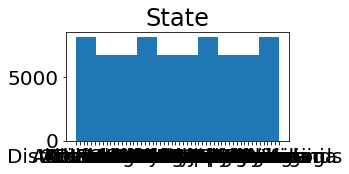

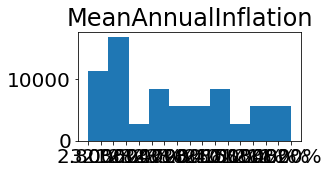

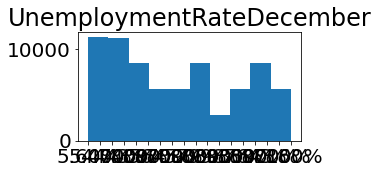

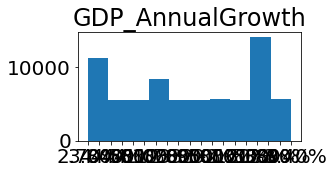

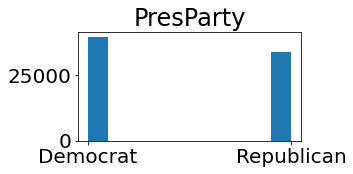

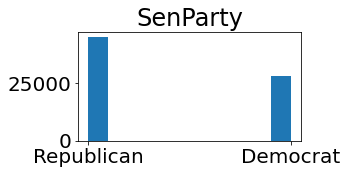

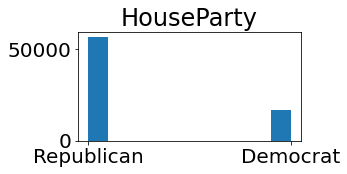

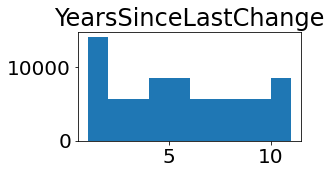

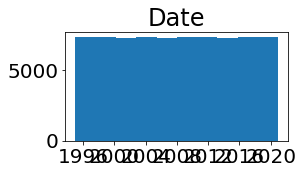

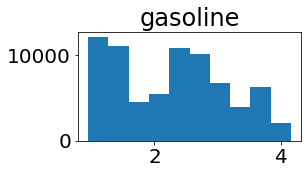

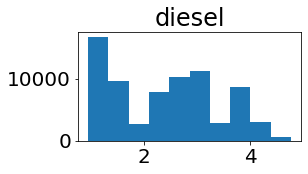

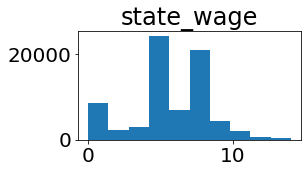

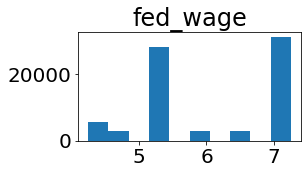

In [25]:
for col in df.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(df[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()

In [26]:
df.columns

Index(['State', 'MeanAnnualInflation', 'UnemploymentRateDecember',
       'GDP_AnnualGrowth', 'PresParty', 'SenParty', 'HouseParty',
       'YearsSinceLastChange', 'Date', 'gasoline', 'diesel', 'state_wage',
       'fed_wage'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73278 entries, 0 to 73277
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   State                     73278 non-null  object        
 1   MeanAnnualInflation       73278 non-null  object        
 2   UnemploymentRateDecember  73278 non-null  object        
 3   GDP_AnnualGrowth          73278 non-null  object        
 4   PresParty                 73278 non-null  object        
 5   SenParty                  73278 non-null  object        
 6   HouseParty                73278 non-null  object        
 7   YearsSinceLastChange      73278 non-null  int64         
 8   Date                      73278 non-null  datetime64[ns]
 9   gasoline                  73278 non-null  float64       
 10  diesel                    73278 non-null  float64       
 11  state_wage                73278 non-null  float64       
 12  fed_wage          

### Converting Year to datetime64

In [28]:
# convert our date column to datetime type
df.set_index('Date',inplace=True)
df

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage
Date,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.00,4.25
1995-01-09,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.134,1.102,0.00,4.25
1995-01-16,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.126,1.100,0.00,4.25
1995-01-23,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.132,1.095,0.00,4.25
1995-01-30,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.131,1.090,0.00,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.211,2.502,5.15,7.25
2020-12-07,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.246,2.526,5.15,7.25
2020-12-14,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.247,2.559,5.15,7.25


In [29]:
df.resample('Y').mean()


,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage
Date,,,,,
1995-12-31,4.0,1.157712,1.109154,3.542963,4.25
1996-12-31,5.0,1.244528,1.235283,3.599444,4.25
1997-12-31,1.0,1.244250,1.198308,3.847593,4.75
1998-12-31,1.0,1.071712,1.043885,4.155185,5.15
1999-12-31,2.0,1.176058,1.120519,4.155185,5.15
2000-12-31,3.0,1.522731,1.490769,4.251111,5.15
2001-12-31,4.0,1.460302,1.400509,4.327407,5.15
2002-12-31,5.0,1.385962,1.318750,4.500185,5.15
2003-12-31,6.0,1.603019,1.509327,4.559630,5.15


<AxesSubplot:xlabel='Date'>

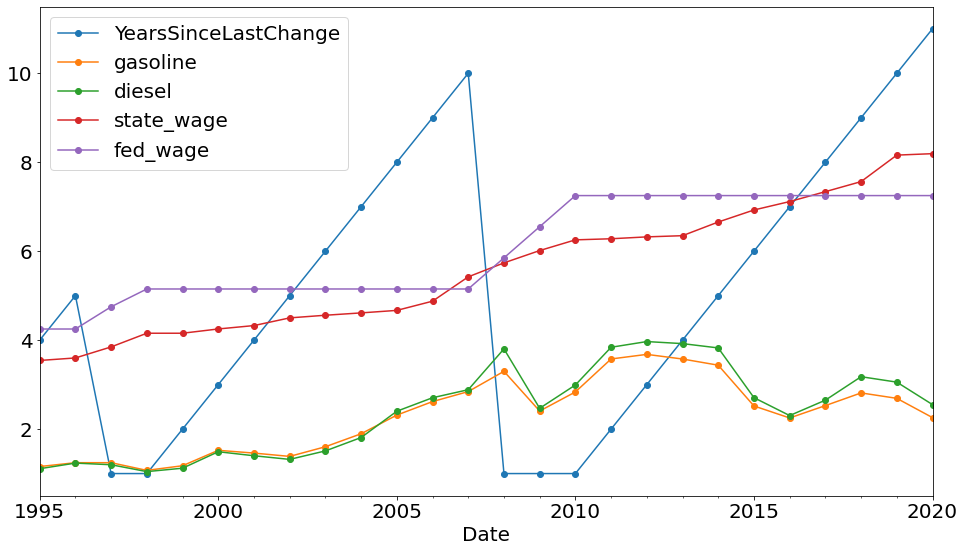

In [30]:
df.resample('Y').mean().plot(marker='o')

<AxesSubplot:xlabel='Date'>

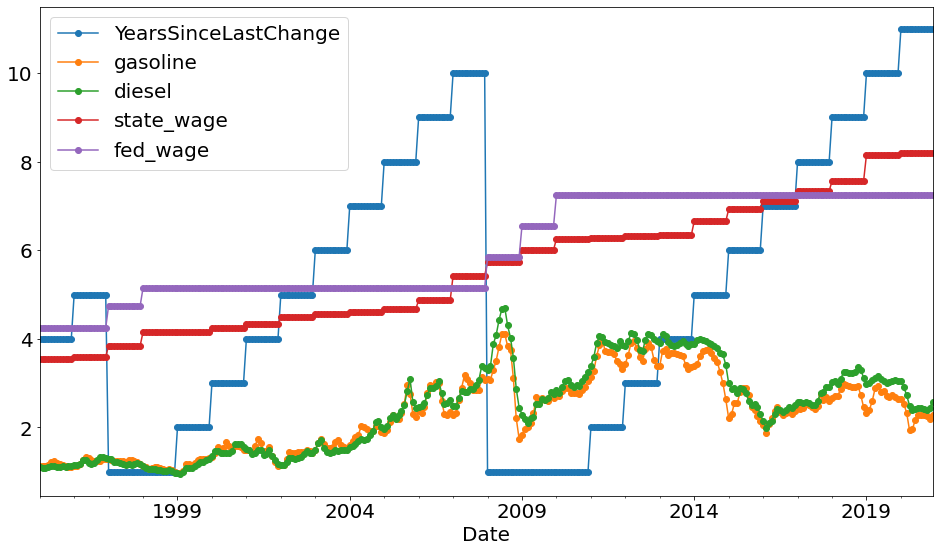

In [31]:
df.resample('M').sum()
df.resample('M').mean().plot(marker='o')

<AxesSubplot:xlabel='Date'>

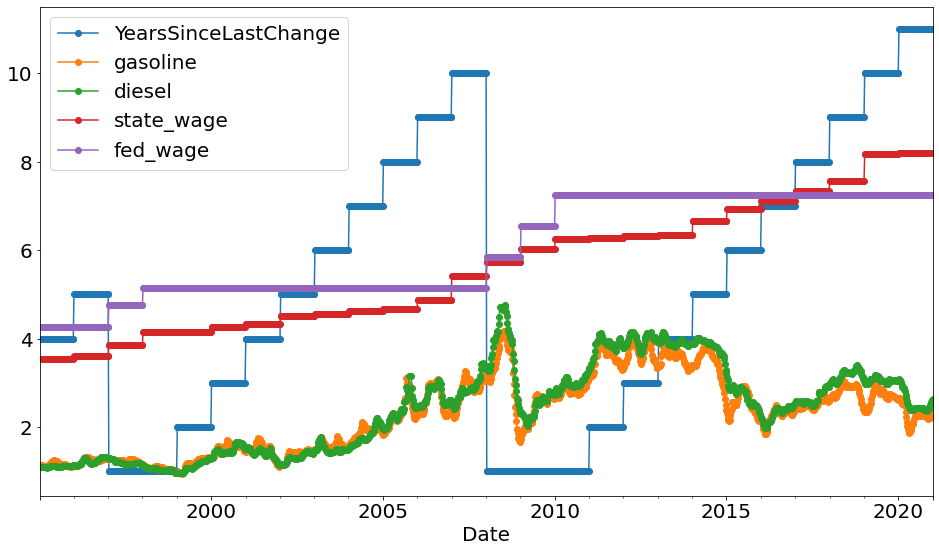

In [32]:
df.resample('W').mean() # Every 3 weeks
df.resample('W').mean().plot(marker='o')

<AxesSubplot:xlabel='Date'>

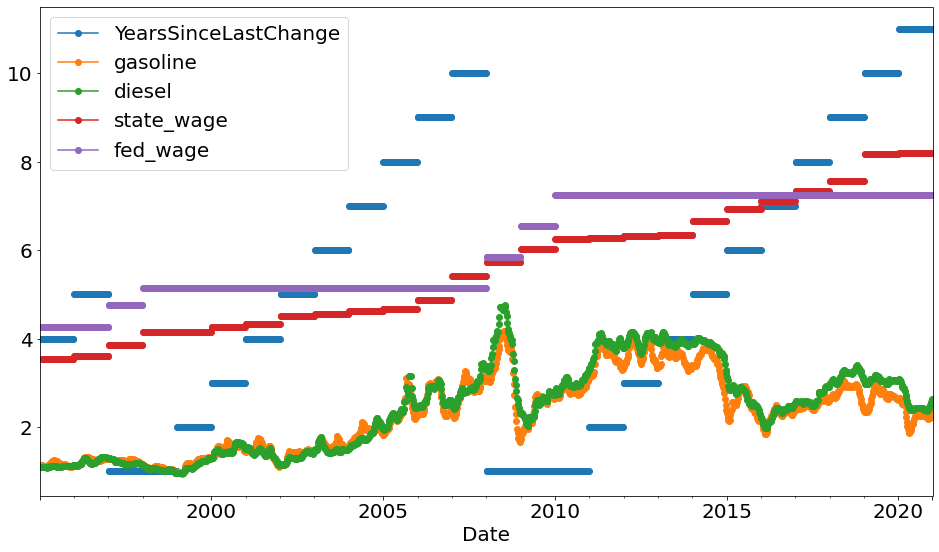

In [33]:
df.resample('D').mean() # Every 3 weeks
df.resample('D').mean().plot(marker='o')

Summary :

In [34]:
df.isnull().sum() # number null values in each column

State                       0
MeanAnnualInflation         0
UnemploymentRateDecember    0
GDP_AnnualGrowth            0
PresParty                   0
SenParty                    0
HouseParty                  0
YearsSinceLastChange        0
gasoline                    0
diesel                      0
state_wage                  0
fed_wage                    0
dtype: int64

In [35]:
df.State.unique() # unique values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [36]:
df.gasoline.describe()

count    73278.000000
mean         2.285283
std          0.859946
min          0.949000
25%          1.459000
50%          2.322000
75%          2.906000
max          4.165000
Name: gasoline, dtype: float64

In [37]:
df.gasoline.min(), df.gasoline.max()

(0.949, 4.165)

In [38]:
df['month'] = df.index.strftime('%m-%b')
df.head(1)

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month
Date,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.0,4.25,01-Jan


In [39]:
df['gas_fed_min'] = df.gasoline / df.fed_wage
df.head(1)

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min
Date,,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.0,4.25,01-Jan,0.265176


In [40]:
df['gas_state_min'] = df.gasoline / df.state_wage
df.head(1)

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min,gas_state_min
Date,,,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.0,4.25,01-Jan,0.265176,inf


In [41]:
df['diesel_fed_min'] = df.diesel / df.fed_wage
df.head(1)

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min,gas_state_min,diesel_fed_min
Date,,,,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.0,4.25,01-Jan,0.265176,inf,0.259765


In [42]:
df['diesel_state_min'] = df.diesel / df.state_wage
df

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min,gas_state_min,diesel_fed_min,diesel_state_min
Date,,,,,,,,,,,,,,,,,
1995-01-02,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,0.00,4.25,01-Jan,0.265176,inf,0.259765,inf
1995-01-09,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.134,1.102,0.00,4.25,01-Jan,0.266824,inf,0.259294,inf
1995-01-16,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.126,1.100,0.00,4.25,01-Jan,0.264941,inf,0.258824,inf
1995-01-23,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.132,1.095,0.00,4.25,01-Jan,0.266353,inf,0.257647,inf
1995-01-30,Alabama,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.131,1.090,0.00,4.25,01-Jan,0.266118,inf,0.256471,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.211,2.502,5.15,7.25,11-Nov,0.304966,0.429320,0.345103,0.485825
2020-12-07,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.246,2.526,5.15,7.25,12-Dec,0.309793,0.436117,0.348414,0.490485
2020-12-14,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.247,2.559,5.15,7.25,12-Dec,0.309931,0.436311,0.352966,0.496893


In [43]:
df.gas_state_min.min()

0.1335714285714286

In [44]:
df = df[df.diesel_state_min >= 0.15495934959349592]
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df

,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min,gas_state_min,diesel_fed_min,diesel_state_min
Date,,,,,,,,,,,,,,,,,
1995-01-02,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,4.75,4.25,01-Jan,0.265176,0.237263,0.259765,0.232421
1995-01-09,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.134,1.102,4.75,4.25,01-Jan,0.266824,0.238737,0.259294,0.232000
1995-01-16,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.126,1.100,4.75,4.25,01-Jan,0.264941,0.237053,0.258824,0.231579
1995-01-23,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.132,1.095,4.75,4.25,01-Jan,0.266353,0.238316,0.257647,0.230526
1995-01-30,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.131,1.090,4.75,4.25,01-Jan,0.266118,0.238105,0.256471,0.229474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.211,2.502,5.15,7.25,11-Nov,0.304966,0.429320,0.345103,0.485825
2020-12-07,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.246,2.526,5.15,7.25,12-Dec,0.309793,0.436117,0.348414,0.490485
2020-12-14,Wyoming,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.247,2.559,5.15,7.25,12-Dec,0.309931,0.436311,0.352966,0.496893


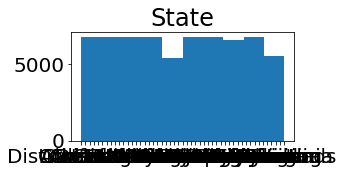

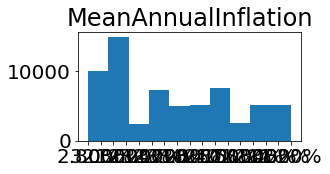

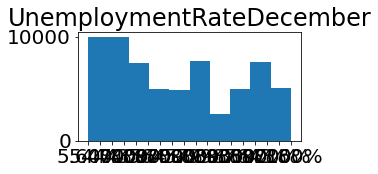

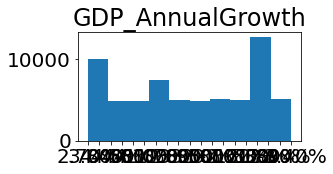

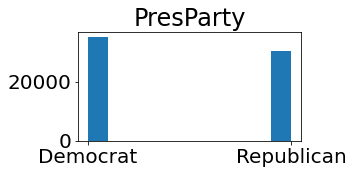

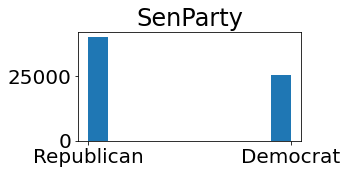

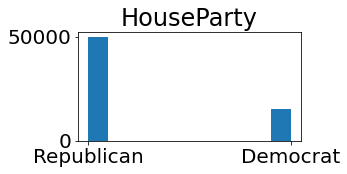

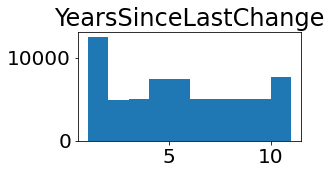

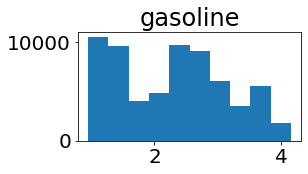

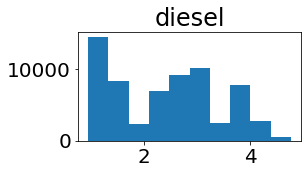

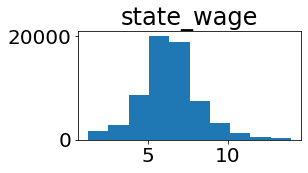

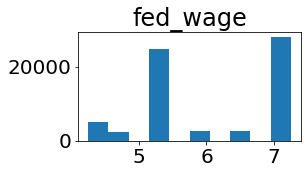

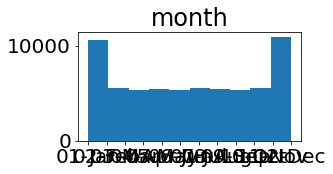

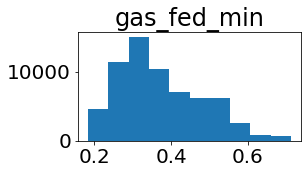

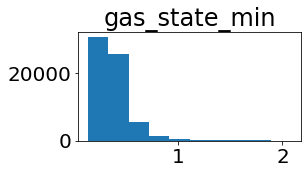

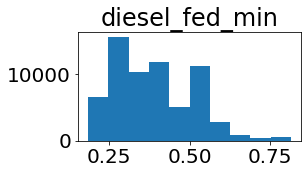

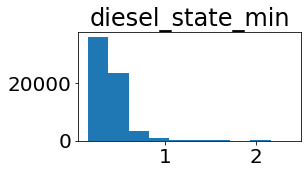

In [45]:
for col in df.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(df[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()

In [46]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 1995-01-02 00:00:00 to 2020-12-28 00:00:00
Shape: (65084, 17)


,State,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min,gas_state_min,diesel_fed_min,diesel_state_min
Date,,,,,,,,,,,,,,,,,
1995-01-02,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,4.75,4.25,01-Jan,0.265176,0.237263,0.259765,0.232421
1995-01-09,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.134,1.102,4.75,4.25,01-Jan,0.266824,0.238737,0.259294,0.232000
1995-01-16,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.126,1.100,4.75,4.25,01-Jan,0.264941,0.237053,0.258824,0.231579
1995-01-23,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.132,1.095,4.75,4.25,01-Jan,0.266353,0.238316,0.257647,0.230526
1995-01-30,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.131,1.090,4.75,4.25,01-Jan,0.266118,0.238105,0.256471,0.229474
1995-02-06,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.124,1.086,4.75,4.25,02-Feb,0.264471,0.236632,0.255529,0.228632
1995-02-13,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.121,1.088,4.75,4.25,02-Feb,0.263765,0.236000,0.256000,0.229053
1995-02-20,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.115,1.088,4.75,4.25,02-Feb,0.262353,0.234737,0.256000,0.229053
1995-02-27,Alaska,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.121,1.089,4.75,4.25,02-Feb,0.263765,0.236000,0.256235,0.229263


## Splitting data

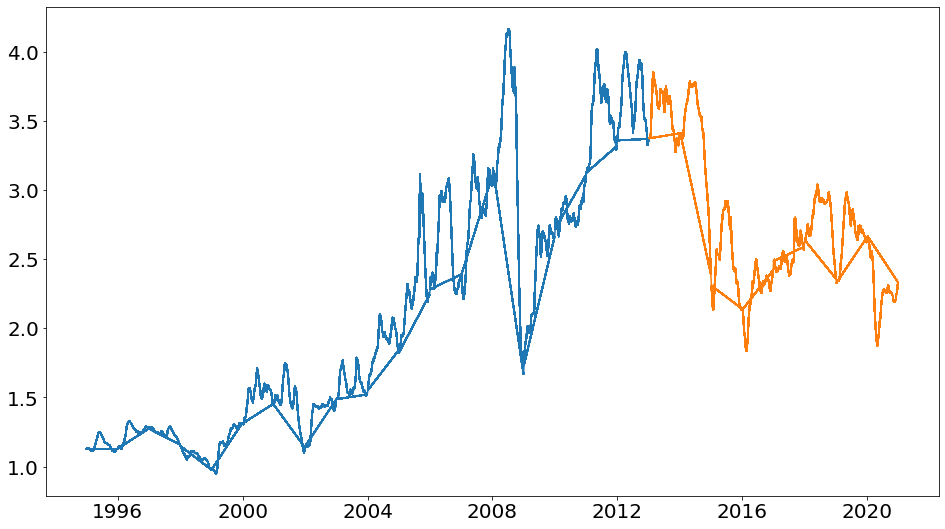

In [47]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.gasoline)
plt.plot(test.index, test.gasoline)


/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_22135/2316967509.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2013']


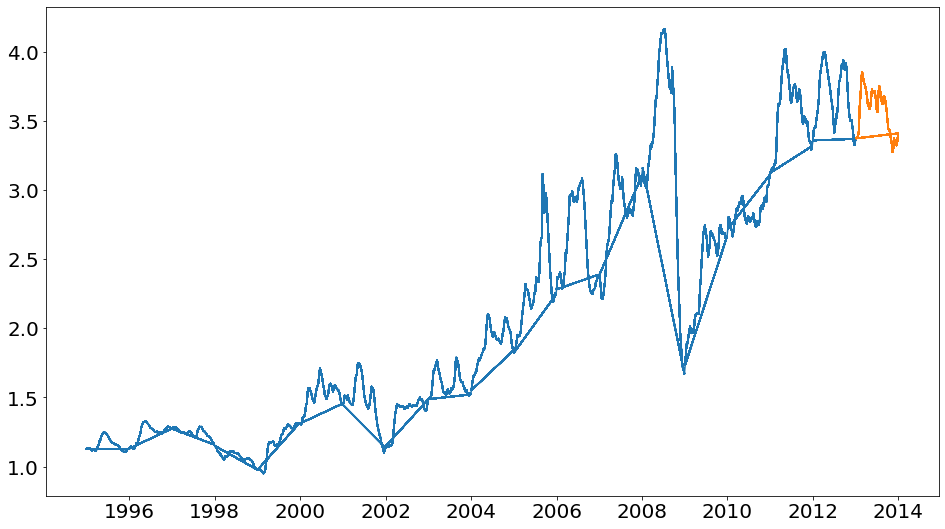

In [48]:
train = df[:'2012'] # includes 2012
test = df['2013']

plt.plot(train.index, train.gasoline)
plt.plot(test.index, test.gasoline)

In [49]:
y = train.gasoline
y.head()


Date
1995-01-02    1.127
1995-01-09    1.134
1995-01-16    1.126
1995-01-23    1.132
1995-01-30    1.131
Name: gasoline, dtype: float64

<AxesSubplot:ylabel='Frequency'>

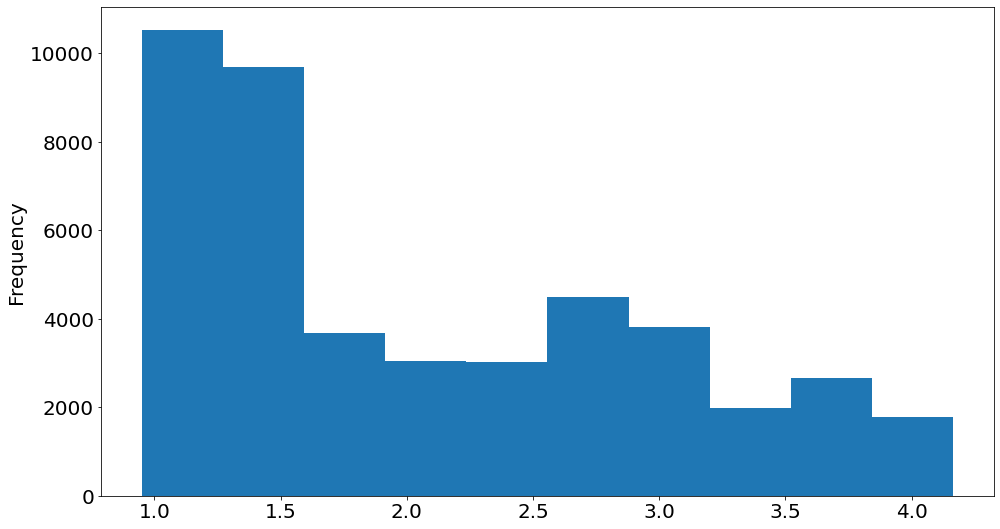

In [50]:
y.plot.hist()


[Text(0.5, 1.0, 'Average gas price by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'gas price (usd)')]

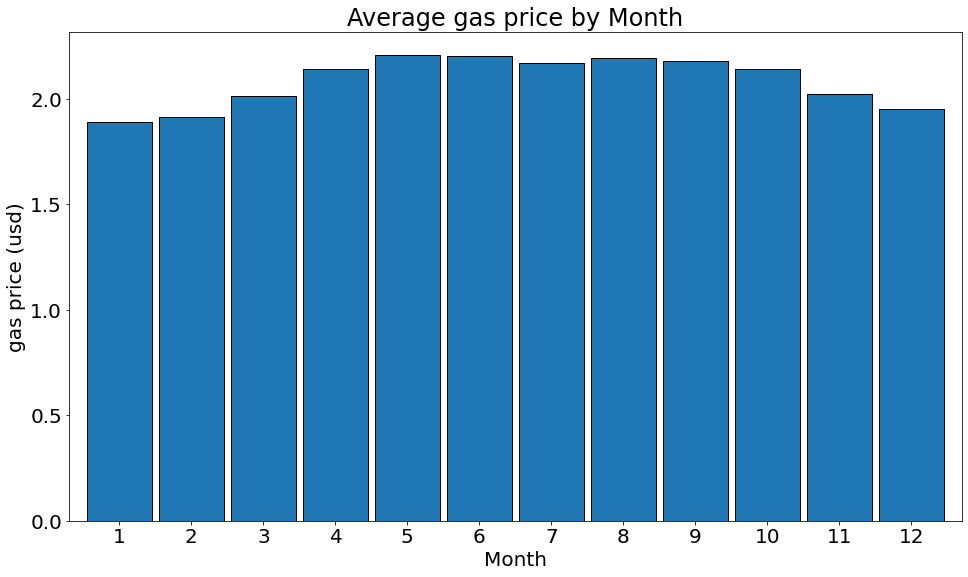

In [51]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average gas price by Month', xlabel='Month', ylabel='gas price (usd)')


[Text(0.5, 1.0, 'Average gas price by Weekday'),
 Text(0.5, 26.200000000000003, 'Weekday'),
 Text(26.200000000000017, 0.5, 'gas price (usd)')]

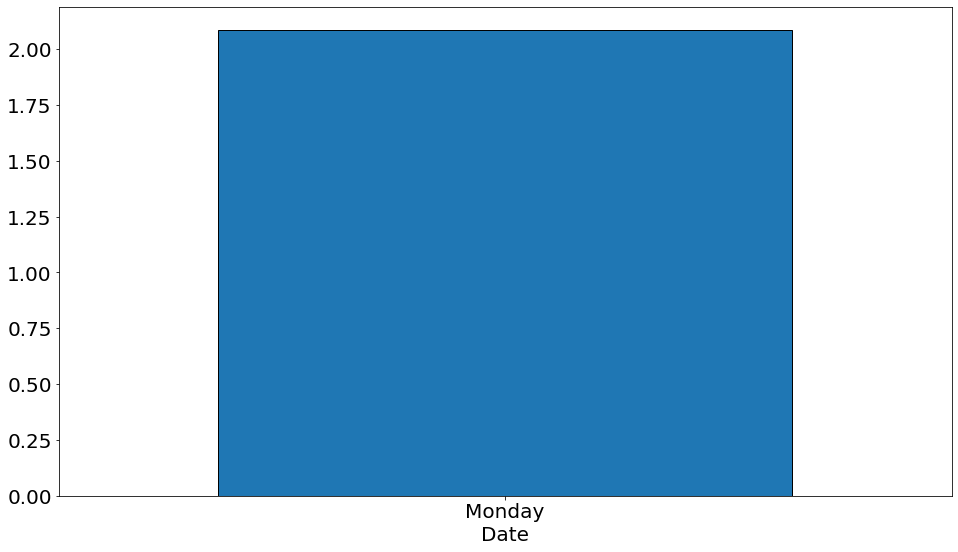

In [52]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average gas price by Weekday', xlabel='Weekday', ylabel='gas price (usd)')


In [53]:
y

Date
1995-01-02    1.127
1995-01-09    1.134
1995-01-16    1.126
1995-01-23    1.132
1995-01-30    1.131
              ...  
2012-12-03    3.463
2012-12-10    3.419
2012-12-17    3.324
2012-12-24    3.328
2012-12-31    3.369
Name: gasoline, Length: 44703, dtype: float64

<AxesSubplot:xlabel='weekday', ylabel='gasoline'>

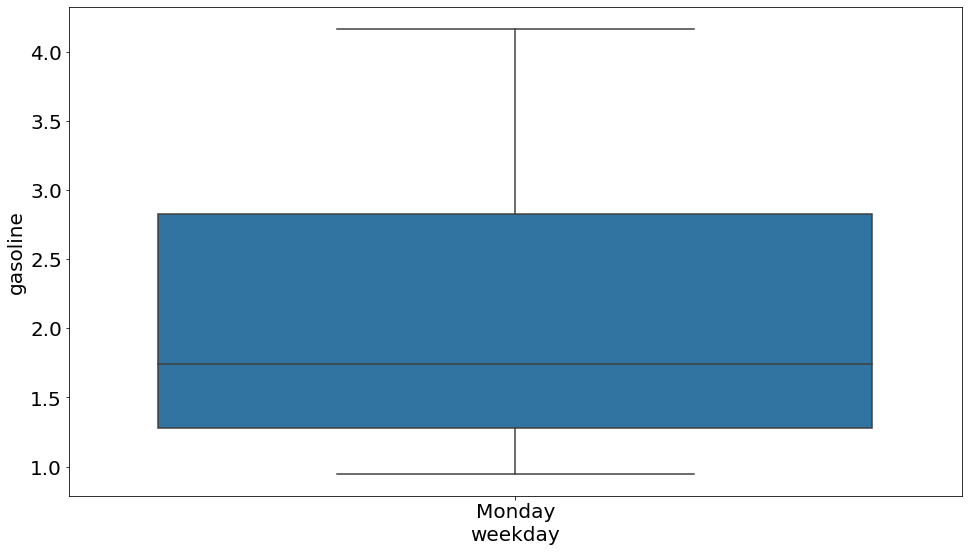

In [54]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.Date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='gasoline', x='weekday')
)


<AxesSubplot:xlabel='Date'>

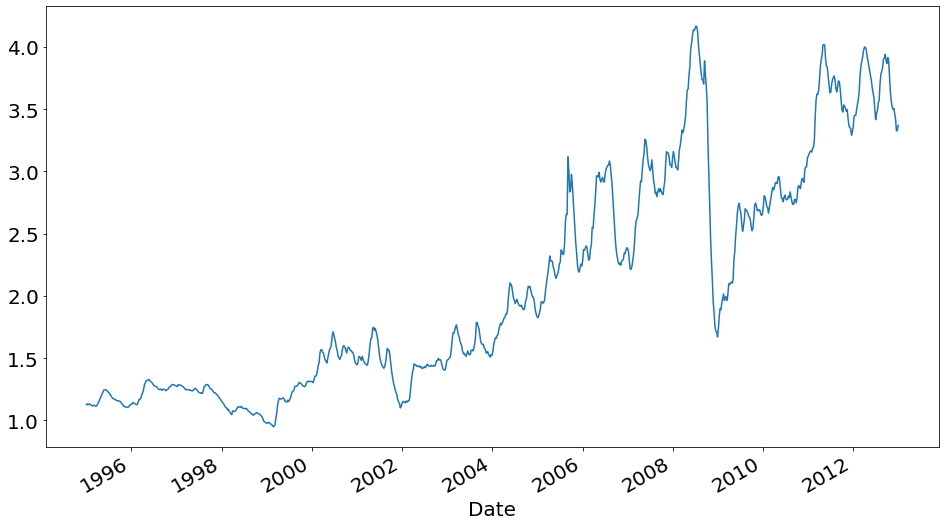

In [55]:
y.plot()

<AxesSubplot:title={'center':'Week average'}, xlabel='Date'>

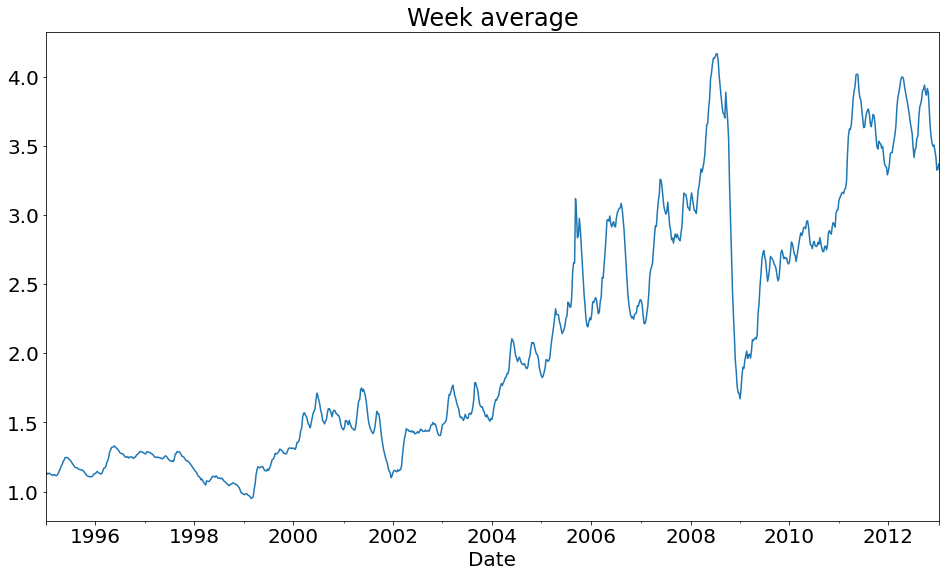

In [56]:
y.resample('W').mean().plot(title='Week average')


<AxesSubplot:title={'center':'Month average'}, xlabel='Date'>

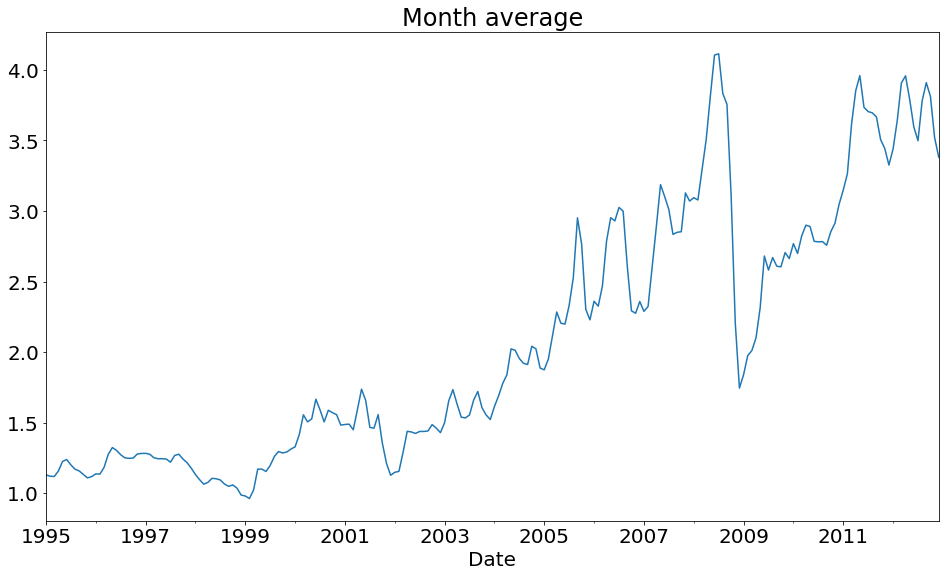

In [57]:
y.resample('M').mean().plot(title='Month average')

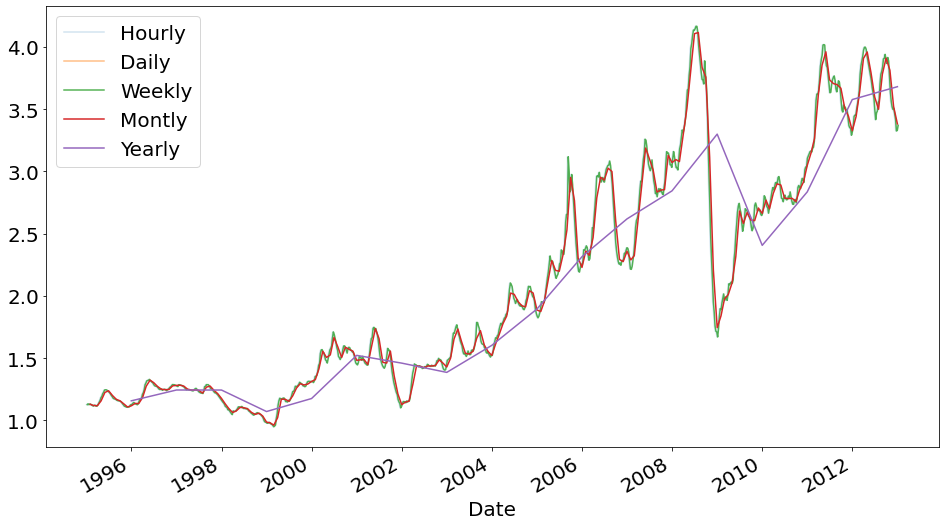

In [58]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()


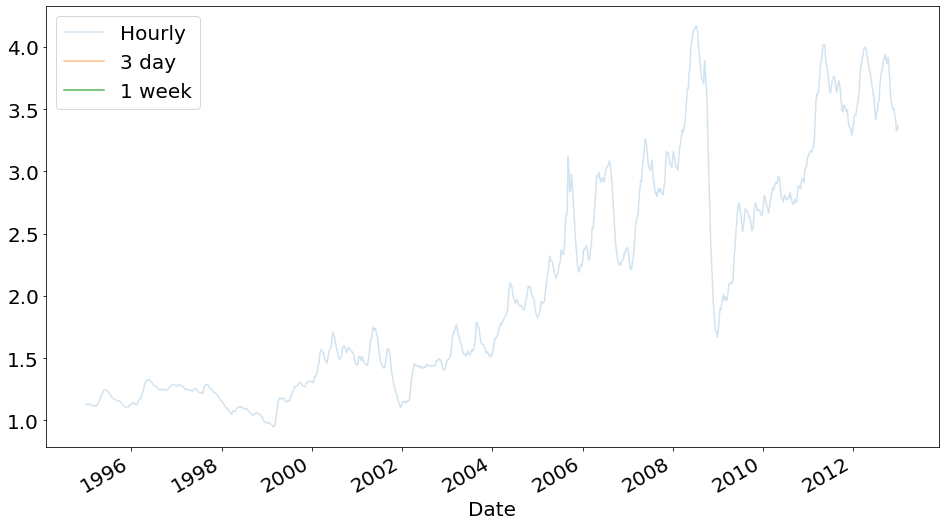

In [59]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()


<AxesSubplot:title={'center':'Average week-to-week change in gas price'}, xlabel='Date'>

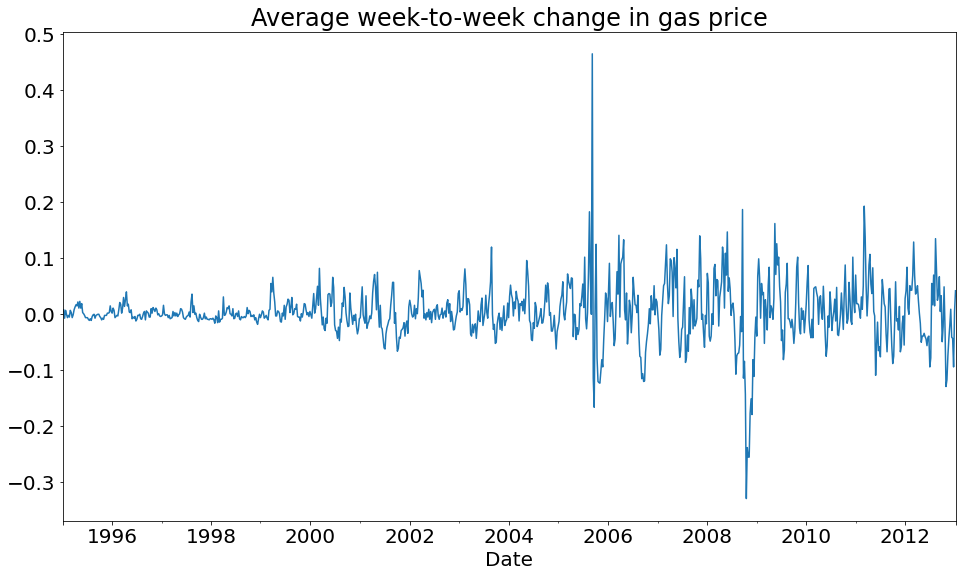

In [60]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in gas price')


<AxesSubplot:title={'center':'Average month-to-month change in gas prices'}, xlabel='Date'>

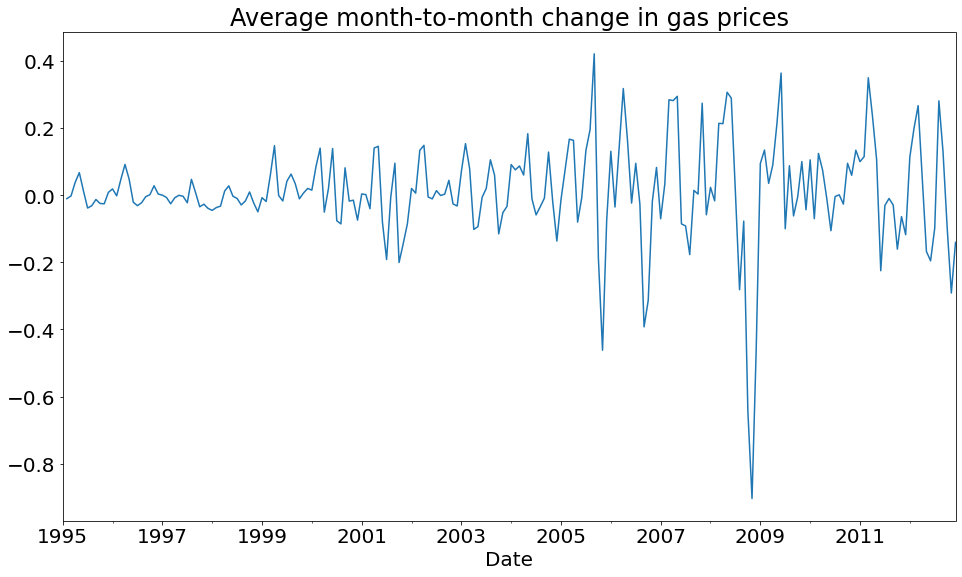

In [61]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in gas prices')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

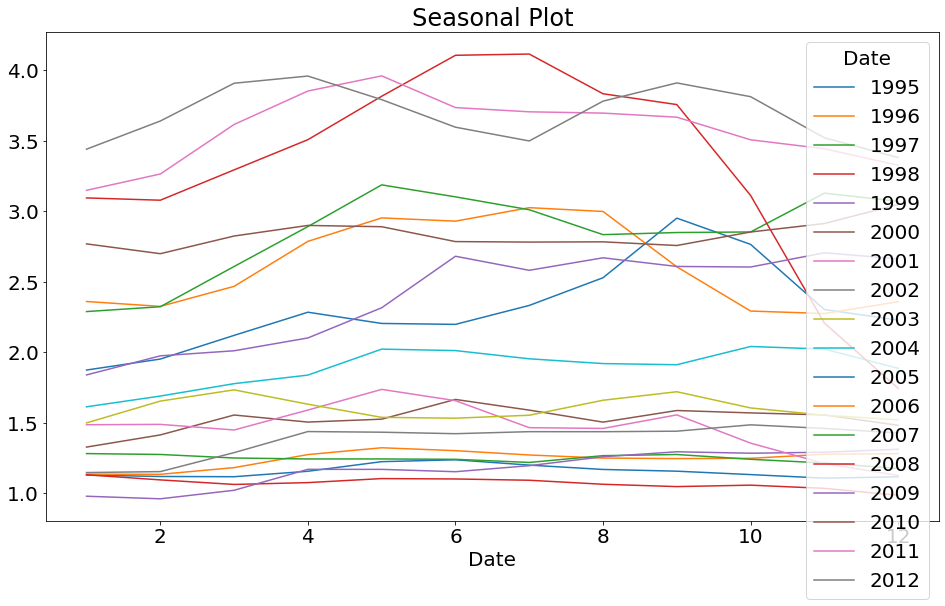

In [62]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


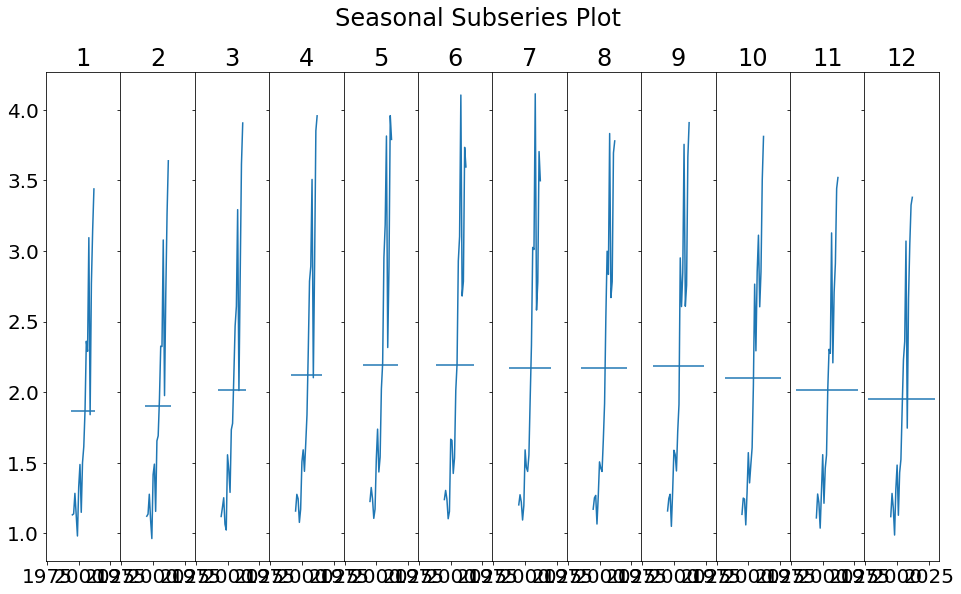

In [63]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

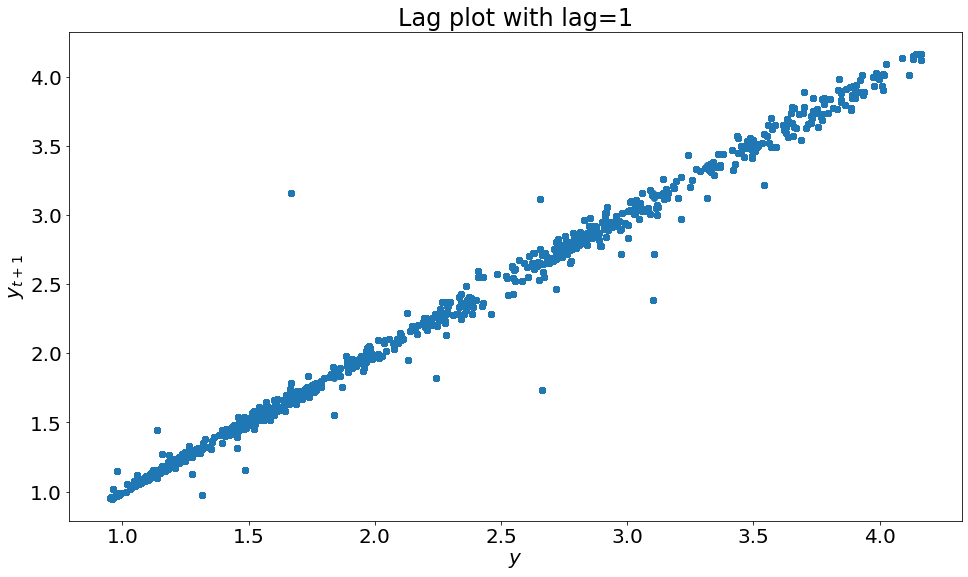

In [64]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_22135/1240324727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.gasoline.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

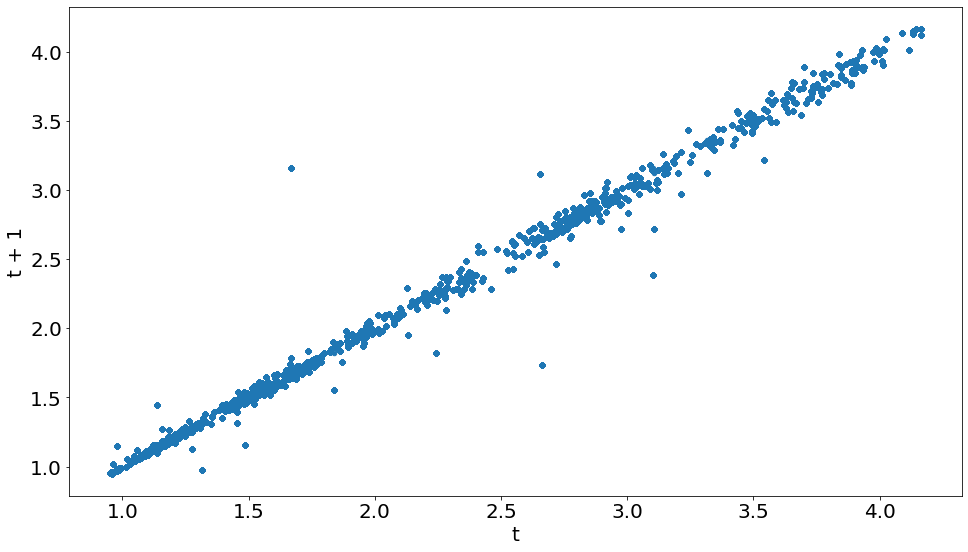

In [65]:
train['y(t + 1)'] = train.gasoline.shift(-1)
ax = train.plot.scatter(x='gasoline', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


In [66]:
del train['y(t + 1)']


,YearsSinceLastChange,this_weeks_price,diesel,state_wage,fed_wage,gas_fed_min,gas_state_min,diesel_fed_min,diesel_state_min,next_week_gas_price
Date,,,,,,,,,,
1995-01-08,4.0,1.127,1.104,4.070638,4.25,0.265176,0.296495,0.259765,0.290444,1.134
1995-01-15,4.0,1.134,1.102,4.070638,4.25,0.266824,0.298337,0.259294,0.289918,1.126
1995-01-22,4.0,1.126,1.100,4.070638,4.25,0.264941,0.296232,0.258824,0.289392,1.132
1995-01-29,4.0,1.132,1.095,4.070638,4.25,0.266353,0.297811,0.257647,0.288076,1.131
1995-02-05,4.0,1.131,1.090,4.070638,4.25,0.266118,0.297547,0.256471,0.286761,1.124
...,...,...,...,...,...,...,...,...,...,...
2012-12-09,3.0,3.463,4.027,7.111667,7.25,0.477655,0.517693,0.555448,0.602007,3.419
2012-12-16,3.0,3.419,3.991,7.111667,7.25,0.471586,0.511116,0.550483,0.596625,3.324
2012-12-23,3.0,3.324,3.945,7.111667,7.25,0.458483,0.496914,0.544138,0.589749,3.328


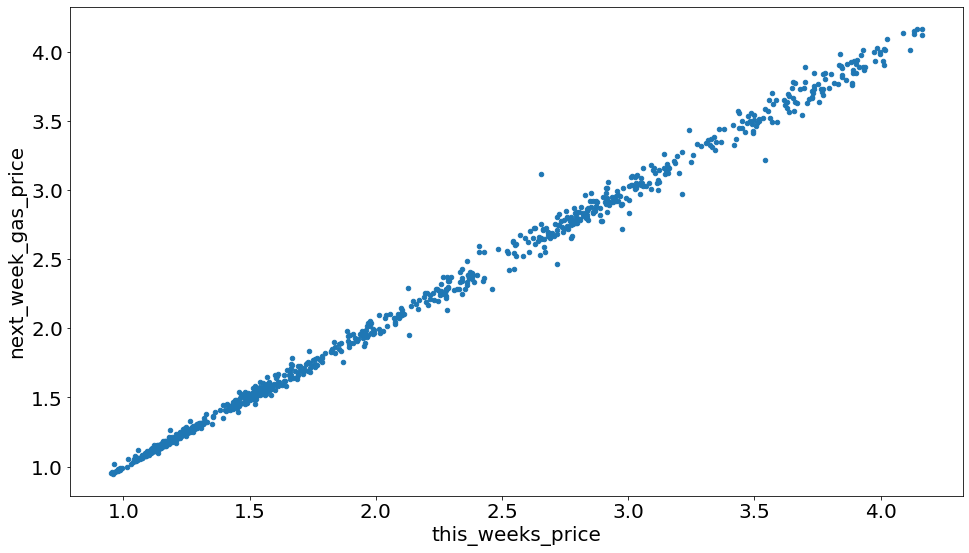

In [67]:
weekly = train.resample('W').mean()
weekly['next_week_gas_price'] = weekly.gasoline.shift(-1)
weekly = weekly.rename(columns={'gasoline': 'this_weeks_price'})
weekly.plot.scatter(x='this_weeks_price', y='next_week_gas_price')
weekly

,YearsSinceLastChange,this_week,diesel,state_wage,fed_wage,gas_fed_min,gas_state_min,diesel_fed_min,diesel_state_min,12_weeks_out
Date,,,,,,,,,,
1995-01-08,4.0,1.127,1.104,4.070638,4.25,0.265176,0.296495,0.259765,0.290444,1.121
1995-01-15,4.0,1.134,1.102,4.070638,4.25,0.266824,0.298337,0.259294,0.289918,1.133
1995-01-22,4.0,1.126,1.100,4.070638,4.25,0.264941,0.296232,0.258824,0.289392,1.149
1995-01-29,4.0,1.132,1.095,4.070638,4.25,0.266353,0.297811,0.257647,0.288076,1.163
1995-02-05,4.0,1.131,1.090,4.070638,4.25,0.266118,0.297547,0.256471,0.286761,1.184
...,...,...,...,...,...,...,...,...,...,...
2012-12-09,3.0,3.463,4.027,7.111667,7.25,0.477655,0.517693,0.555448,0.602007,NaN
2012-12-16,3.0,3.419,3.991,7.111667,7.25,0.471586,0.511116,0.550483,0.596625,NaN
2012-12-23,3.0,3.324,3.945,7.111667,7.25,0.458483,0.496914,0.544138,0.589749,NaN


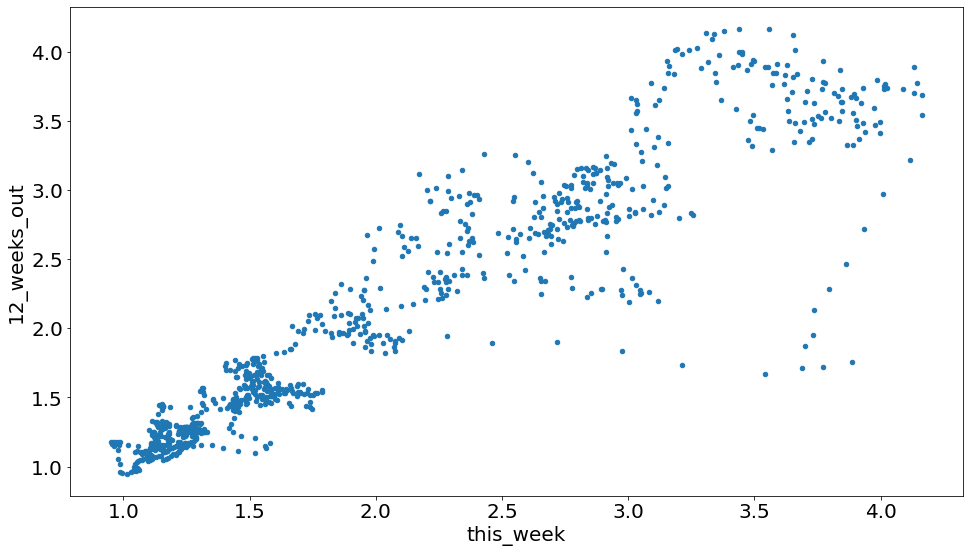

In [68]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.gasoline.shift(-12)
weekly = weekly.rename(columns={'gasoline': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,YearsSinceLastChange,this_week,diesel,state_wage,fed_wage,gas_fed_min,gas_state_min,diesel_fed_min,diesel_state_min,half_a_year_later
Date,,,,,,,,,,
1995-01-08,4.0,1.127,1.104,4.070638,4.25,0.265176,0.296495,0.259765,0.290444,1.222
1995-01-15,4.0,1.134,1.102,4.070638,4.25,0.266824,0.298337,0.259294,0.289918,1.212
1995-01-22,4.0,1.126,1.100,4.070638,4.25,0.264941,0.296232,0.258824,0.289392,1.200
1995-01-29,4.0,1.132,1.095,4.070638,4.25,0.266353,0.297811,0.257647,0.288076,1.191
1995-02-05,4.0,1.131,1.090,4.070638,4.25,0.266118,0.297547,0.256471,0.286761,1.179
...,...,...,...,...,...,...,...,...,...,...
2012-12-09,3.0,3.463,4.027,7.111667,7.25,0.477655,0.517693,0.555448,0.602007,NaN
2012-12-16,3.0,3.419,3.991,7.111667,7.25,0.471586,0.511116,0.550483,0.596625,NaN
2012-12-23,3.0,3.324,3.945,7.111667,7.25,0.458483,0.496914,0.544138,0.589749,NaN


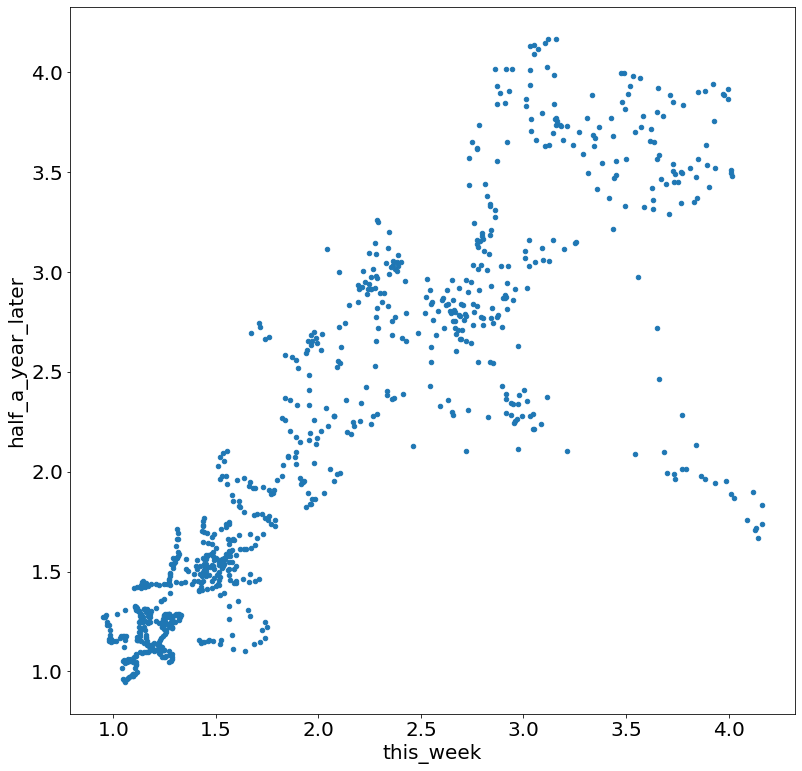

In [69]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.gasoline.shift(-26)
weekly = weekly.rename(columns={'gasoline': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

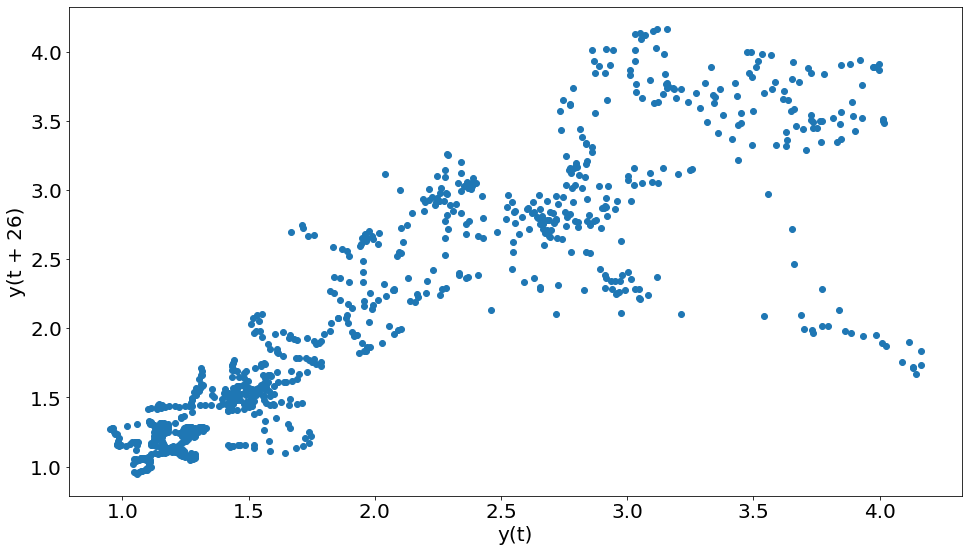

In [70]:
pd.plotting.lag_plot(train.gasoline.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

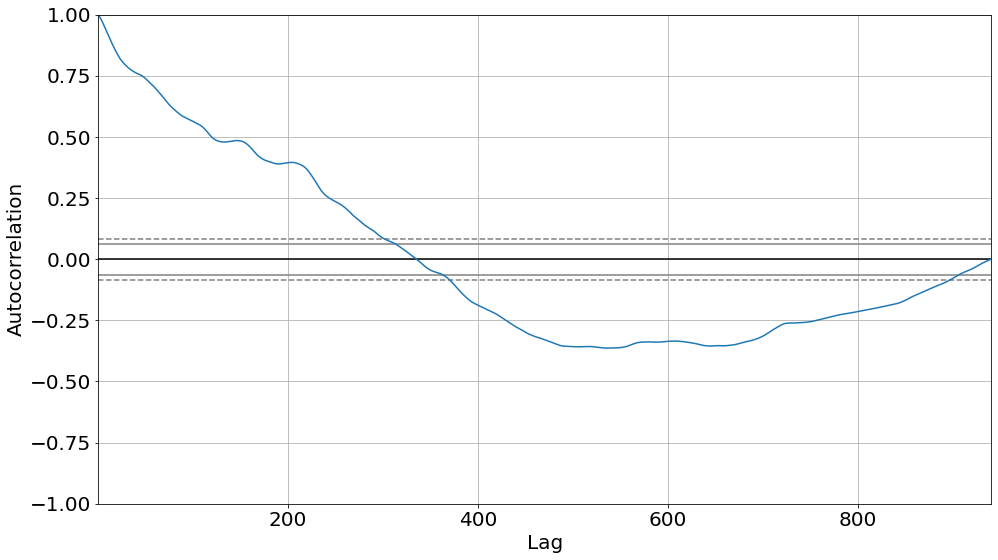

In [71]:
pd.plotting.autocorrelation_plot(train.gasoline.resample('W').mean())

In [72]:
y = train.gasoline.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
Date,,,,
1995-01-08,1.127,NaN,-0.186673,NaN
1995-01-15,1.134,NaN,-0.192849,NaN
1995-01-22,1.126,NaN,-0.181138,NaN
1995-01-29,1.132,NaN,-0.159047,NaN
1995-02-05,1.131,NaN,-0.148247,NaN


<AxesSubplot:xlabel='Date'>

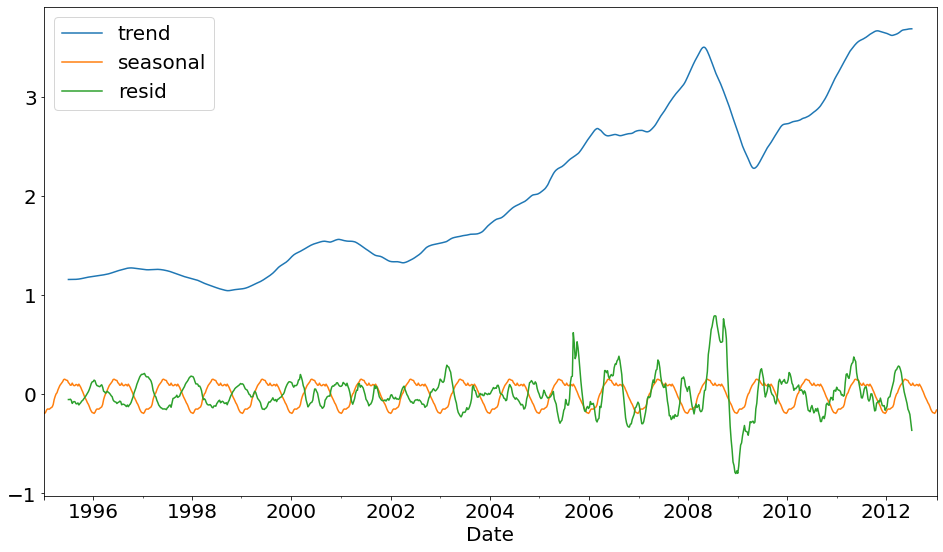

In [73]:
decomposition.iloc[:, 1:].plot()

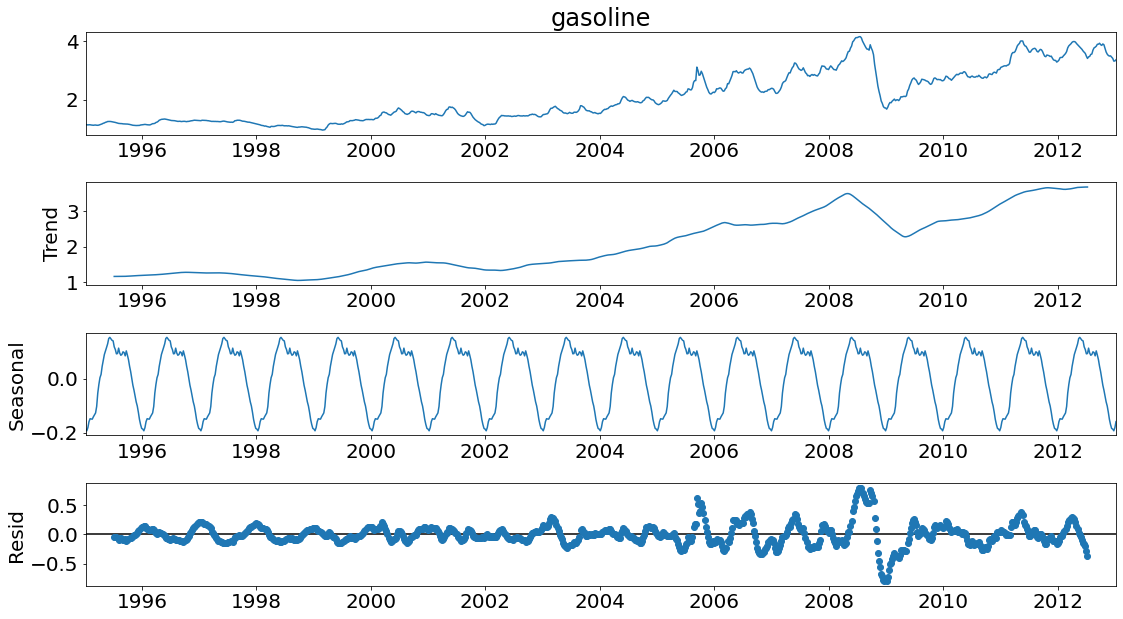

In [74]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Categories over time
How can we visualize categories over time?

In [75]:
train = train.resample('W').mean()
# create a categorical feature
train['gasprice_bin'] = pd.qcut(train.gasoline, 4, labels=['lowest', 'low', 'medium', 'high'])
train.groupby('gasprice_bin').mean()


,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,gas_fed_min,gas_state_min,diesel_fed_min,diesel_state_min
gasprice_bin,,,,,,,,,
lowest,2.673729,1.156297,1.124331,4.487017,4.749153,0.245888,0.281598,0.239127,0.273760
low,4.222222,1.478205,1.426863,4.963840,5.070513,0.291668,0.320553,0.281360,0.309192
medium,5.370213,2.291043,2.367762,5.905899,5.730851,0.402749,0.415737,0.415676,0.428769
high,3.987234,3.376017,3.597017,6.585794,6.427872,0.532631,0.548930,0.565678,0.583589


Text(0, 0.5, '% of days in the month')

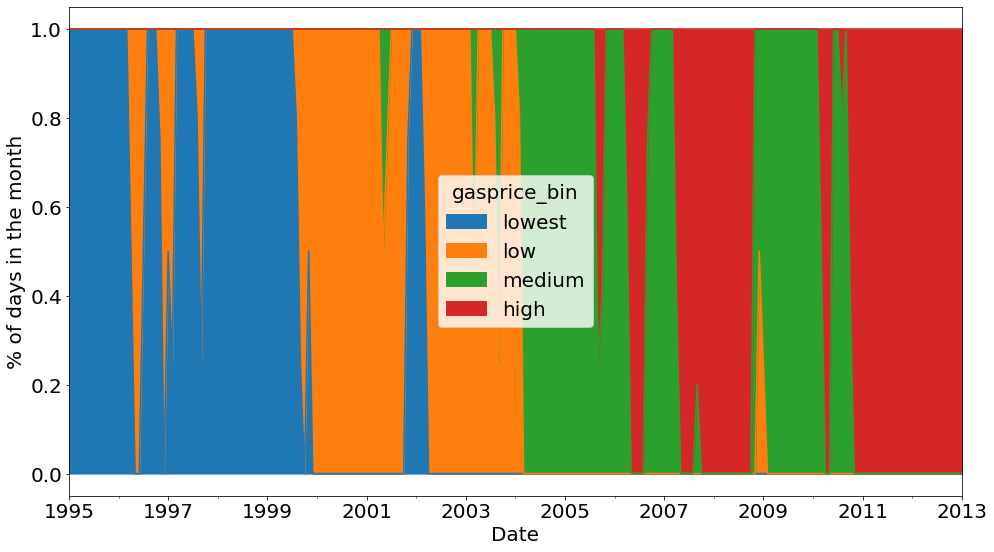

In [76]:
(train.groupby('gasprice_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')


/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_22135/1174628149.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2008']


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

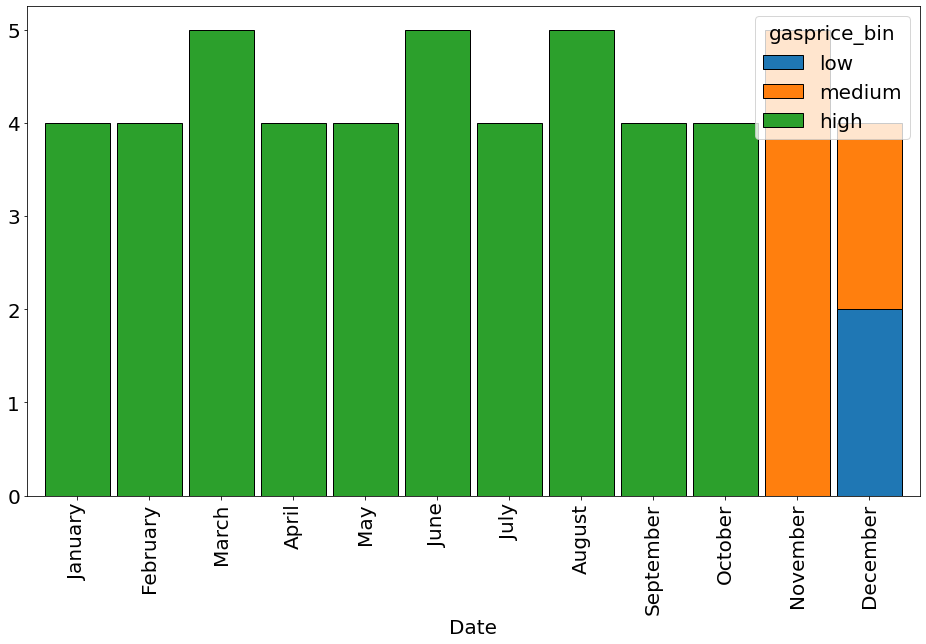

In [77]:
ax = (train['2008']
 .groupby('gasprice_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)


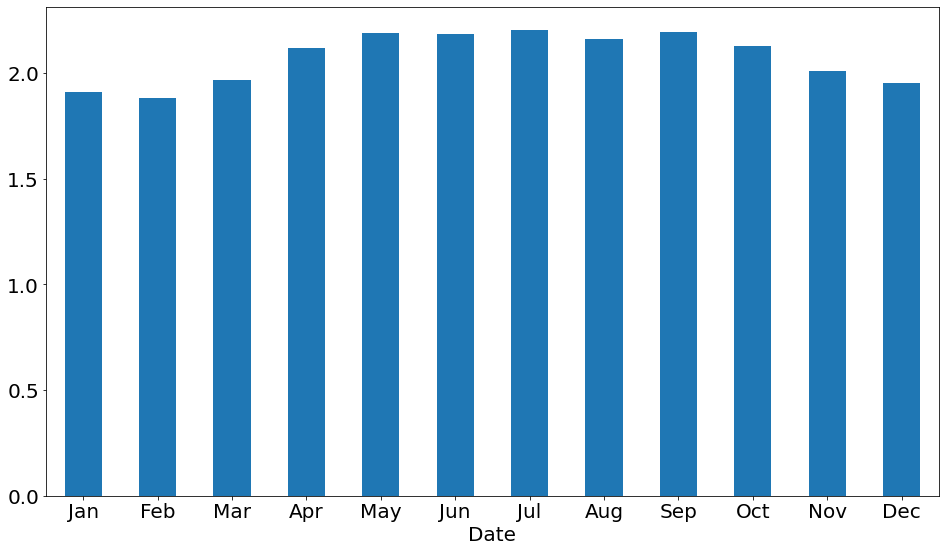

In [78]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None


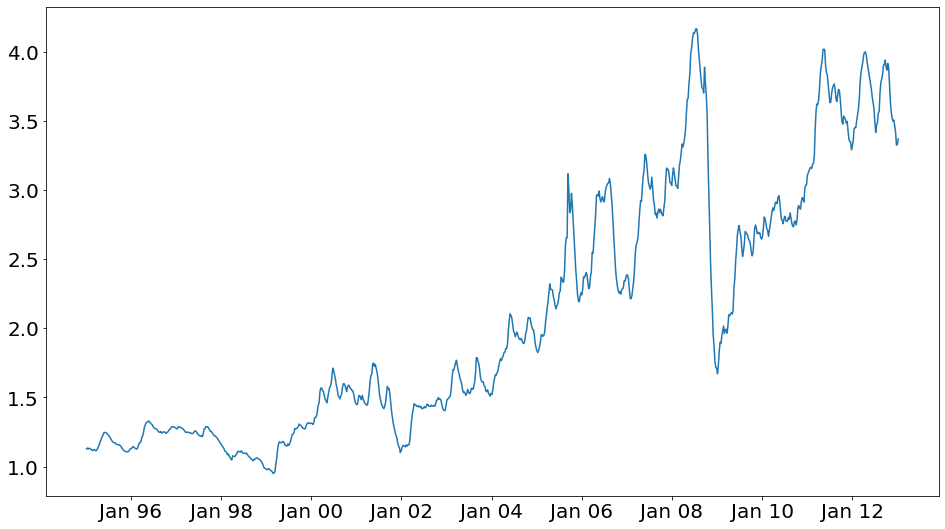

In [79]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))


In [80]:
train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]


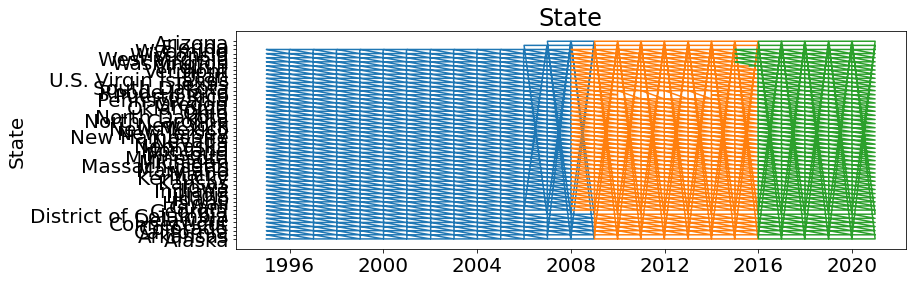

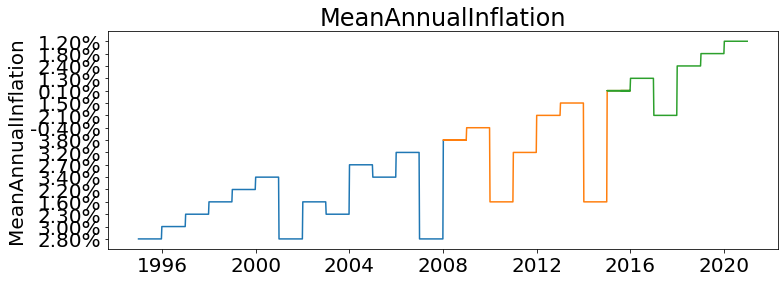

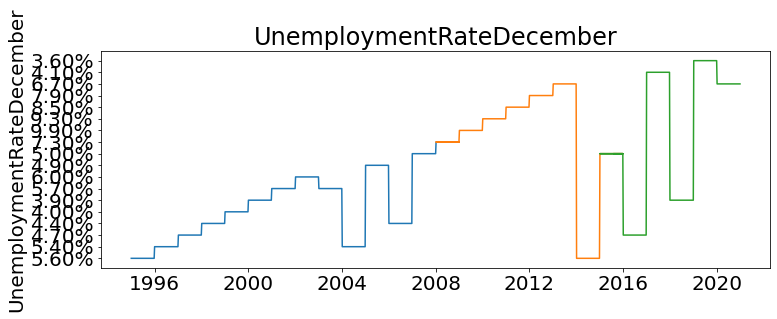

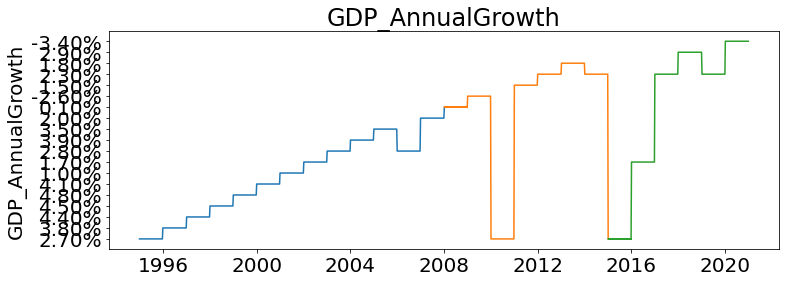

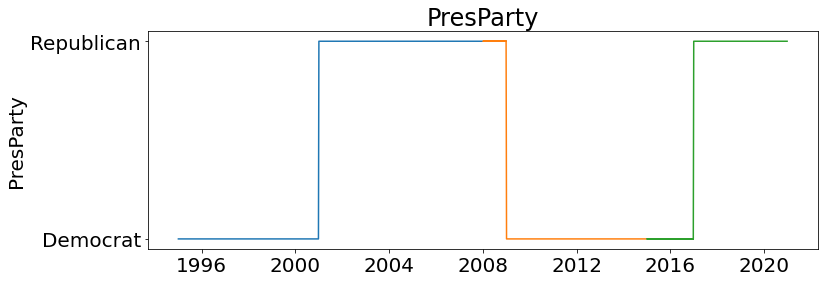

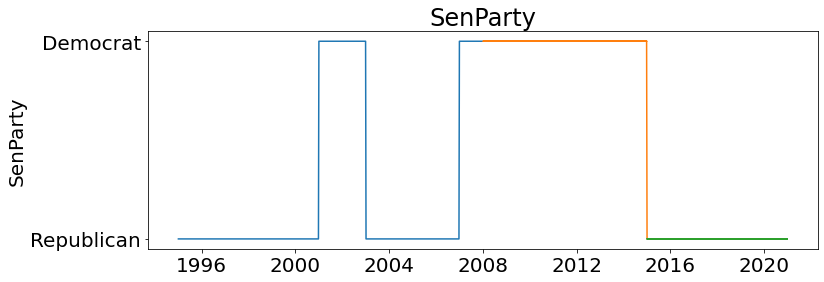

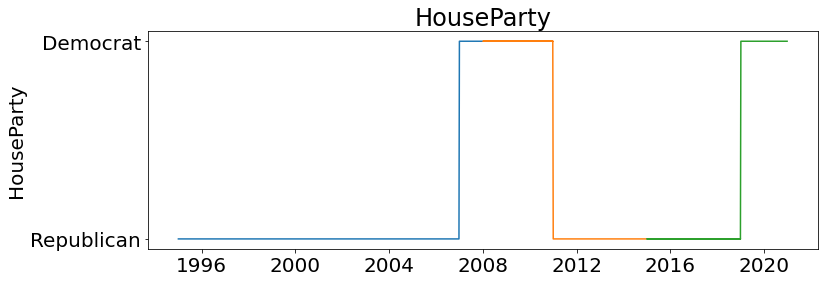

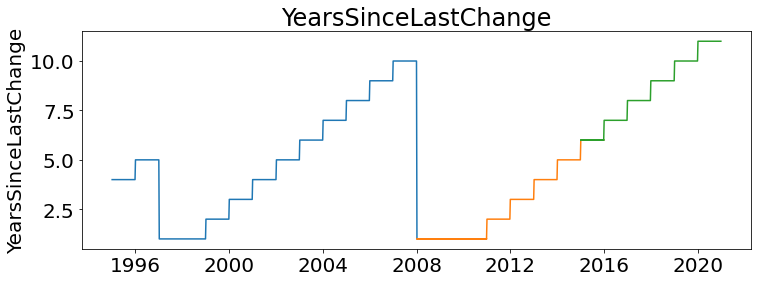

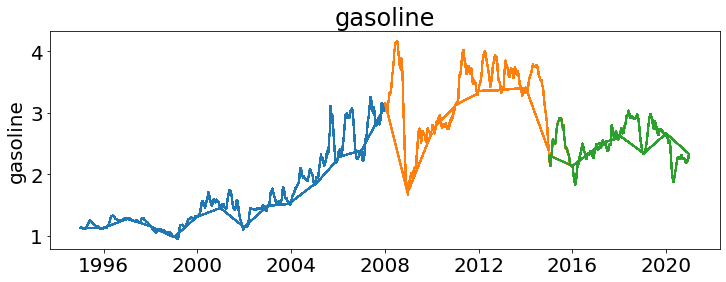

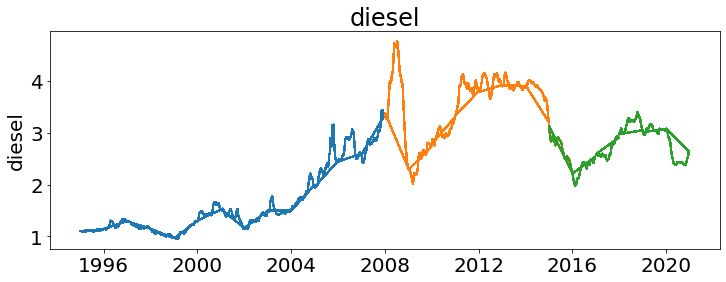

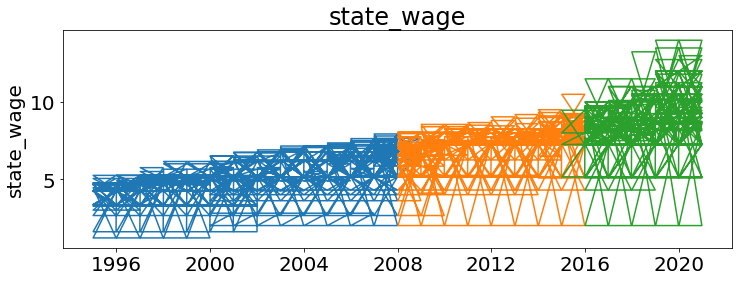

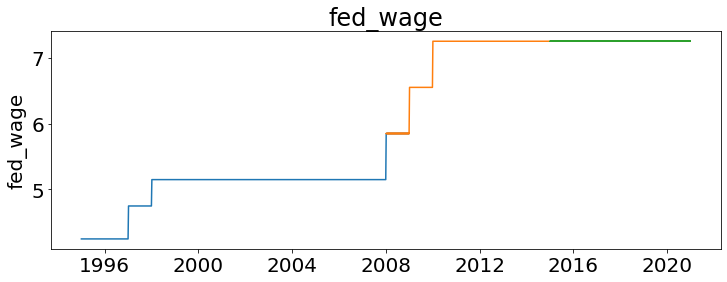

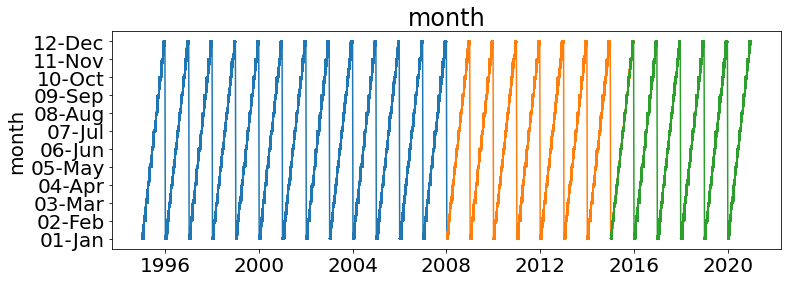

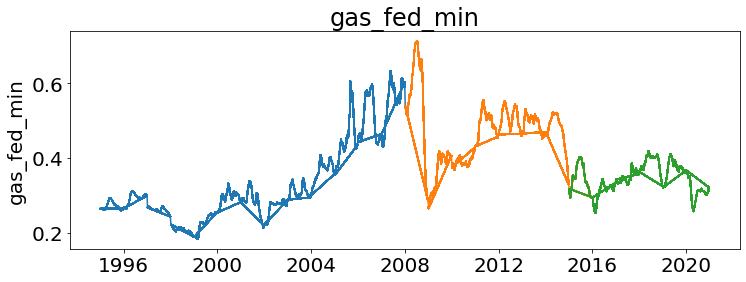

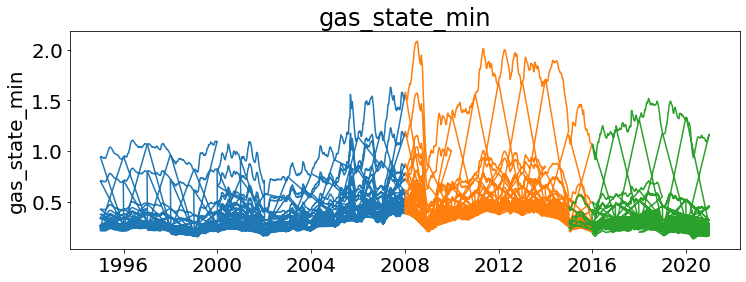

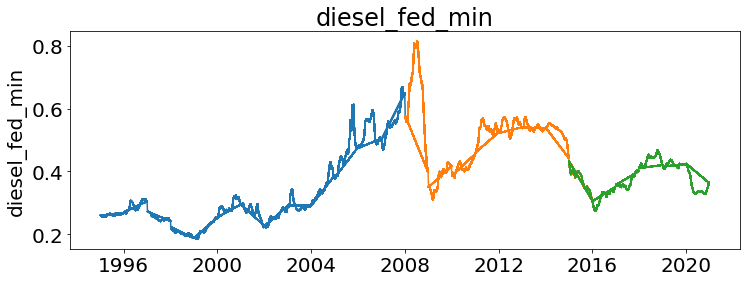

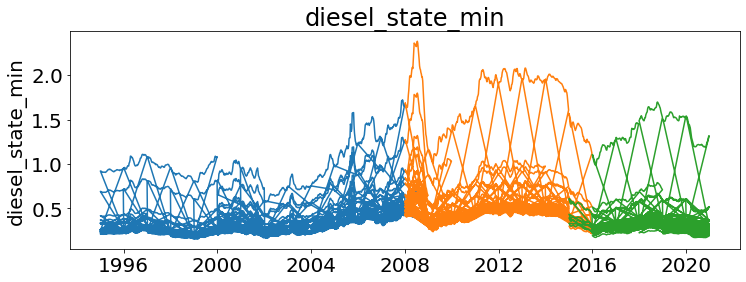

In [81]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()


In [82]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [83]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [84]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32542 entries, 1995-01-02 to 2008-01-21
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     32542 non-null  object 
 1   MeanAnnualInflation       32542 non-null  object 
 2   UnemploymentRateDecember  32542 non-null  object 
 3   GDP_AnnualGrowth          32542 non-null  object 
 4   PresParty                 32542 non-null  object 
 5   SenParty                  32542 non-null  object 
 6   HouseParty                32542 non-null  object 
 7   YearsSinceLastChange      32542 non-null  int64  
 8   gasoline                  32542 non-null  float64
 9   diesel                    32542 non-null  float64
 10  state_wage                32542 non-null  float64
 11  fed_wage                  32542 non-null  float64
 12  month                     32542 non-null  object 
 13  gas_fed_min               32542 non-null  fl

In [86]:
items = train['fed_wage'][-1:][0]
dollars = round(train['gasoline'][-1:][0],2)

yhat_df = pd.DataFrame({'fed_wage': [train.fed_wage], 'gasoline': [train.gasoline]}, 
                       index = validate.index)

yhat_df


,fed_wage,gasoline
Date,,
2008-01-28,Date 1995-01-02 4.25 1995-01-09 4.25 1995-01-16 4.25 1995-01-23 4.25 1995-...,Date 1995-01-02 1.127 1995-01-09 1.134 1995-01-16 1.126 1995-01-23 1.132 1...
2008-02-04,Date 1995-01-02 4.25 1995-01-09 4.25 1995-01-16 4.25 1995-01-23 4.25 1995-...,Date 1995-01-02 1.127 1995-01-09 1.134 1995-01-16 1.126 1995-01-23 1.132 1...
2008-02-11,Date 1995-01-02 4.25 1995-01-09 4.25 1995-01-16 4.25 1995-01-23 4.25 1995-...,Date 1995-01-02 1.127 1995-01-09 1.134 1995-01-16 1.126 1995-01-23 1.132 1...
2008-02-18,Date 1995-01-02 4.25 1995-01-09 4.25 1995-01-16 4.25 1995-01-23 4.25 1995-...,Date 1995-01-02 1.127 1995-01-09 1.134 1995-01-16 1.126 1995-01-23 1.132 1...
2008-02-25,Date 1995-01-02 4.25 1995-01-09 4.25 1995-01-16 4.25 1995-01-23 4.25 1995-...,Date 1995-01-02 1.127 1995-01-09 1.134 1995-01-16 1.126 1995-01-23 1.132 1...
...,...,...
2015-07-13,Date 1995-01-02 4.25 1995-01-09 4.25 1995-01-16 4.25 1995-01-23 4.25 1995-...,Date 1995-01-02 1.127 1995-01-09 1.134 1995-01-16 1.126 1995-01-23 1.132 1...
2015-07-20,Date 1995-01-02 4.25 1995-01-09 4.25 1995-01-16 4.25 1995-01-23 4.25 1995-...,Date 1995-01-02 1.127 1995-01-09 1.134 1995-01-16 1.126 1995-01-23 1.132 1...
2015-07-27,Date 1995-01-02 4.25 1995-01-09 4.25 1995-01-16 4.25 1995-01-23 4.25 1995-...,Date 1995-01-02 1.127 1995-01-09 1.134 1995-01-16 1.126 1995-01-23 1.132 1...


KeyError: 'diesel_state_min'

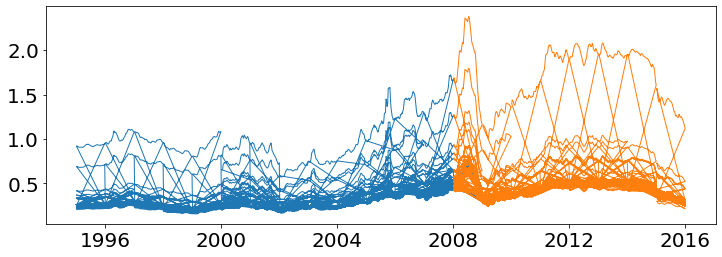

In [87]:
    plot_and_eval(col)


In [88]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

KeyError: 'State'

In [89]:
for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).